**Exploratory Data Analysis**

1-Data Description:
The Haberman’s survival data set contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

2-Prerequisites
There’s one thing to do before we get started, however: learn about pandas, the linchpin of the Python data science ecosystem. pandas contains all of the data reading, writing, and manipulation tools that you will need to probe your data, run your models, and of course, visualize.

3-Data Loading and Preparation
We start by importing basic libraries and loading the data.



In [44]:
#Pandas for data processing
#Numpy for numerical operations
#Seaborn for visualization
#sklearn for ML techniques
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
#Loading our data
data = pd.read_csv('C:\Users\starinfo\ML\Datasets\haberman.csv')
df = pd.DataFrame(data)

**Understanding the Data**

The first thing to notice is that our data comes with no headers. The dataset description gave us important information about the labels.

In [45]:
list(df.columns)
df.columns = ['Age','Operation_Year','Axil_nodes','Surv_status']
df.head()

,Age,Operation_Year,Axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [9]:
#Useful statistical insights
df.describe()

,Age,Operation_Year,Axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
#A quick look at datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age               305 non-null int64
Operation_Year    305 non-null int64
Axil_nodes        305 non-null int64
Surv_status       305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [12]:
#Checking wether there are some NaN values, this useful for modeling the data later on
#We could also check this through the count row
df.isna().sum()

Age               0
Operation_Year    0
Axil_nodes        0
Surv_status       0
dtype: int64

In [46]:
df.Surv_status = df.Surv_status.map({1:1,2:0})
df['status'] = df.Surv_status.map({1:'alive',0:'dead'})
df.head(10)

,Age,Operation_Year,Axil_nodes,Surv_status,status
0,30,62,3,1,alive
1,30,65,0,1,alive
2,31,59,2,1,alive
3,31,65,4,1,alive
4,33,58,10,1,alive
5,33,60,0,1,alive
6,34,59,0,0,dead
7,34,66,9,0,dead
8,34,58,30,1,alive
9,34,60,1,1,alive


The Survived column is the target variable. If survival = 1 the patient survived, otherwise he’s dead. This is the variable we’re going to predict. This doesn’t make sens as we want to assign the values of 1 and 0 instead. So after running our code we obtain the following results where 1 means alive and 0 means dead. We have also added a new column ‘status’ for better interpretation.

**Observations and questions**

1.The target variable is imbalanced : 75% survived after 5 years of treatment.

2.The age of patients varies from 30 to 83. Most of patients are 61 year old.

3.While the maximum number of nodes is 52 , more than 75% patients have less than 5 nodes.

Now we want to answer some basic questions :

1. How are the variables in the dataset related ? Are they linearly separable?
2. At which age do patient often die ?
3. What’s the impact of axial nodes on the survival status ?

In [25]:
df.corr(method='pearson')

,Age,Operation_Year,Axil_nodes,Surv_status
Age,1.000000,0.092623,-0.066548,-0.064351
Operation_Year,0.092623,1.000000,-0.003277,0.004076
Axil_nodes,-0.066548,-0.003277,1.000000,-0.286191
Surv_status,-0.064351,0.004076,-0.286191,1.000000


In [26]:
df.status.value_counts()

alive    224
dead      81
Name: status, dtype: int64

The impact of cancer treatment seems to be positive as more people tend to survive after 5 years of treatment. Perfect! Let’s now make some visualization. We we’ll be using seaborn library for this task.

C:\Users\starinfo\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\starinfo\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\starinfo\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\starinfo\Anaconda2\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


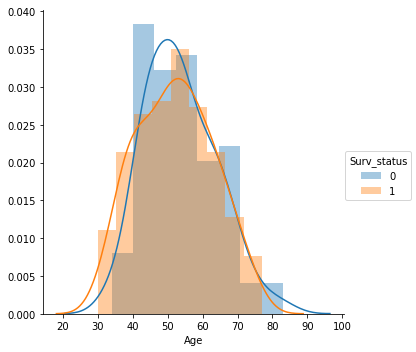

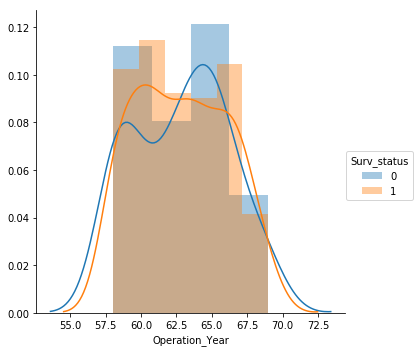

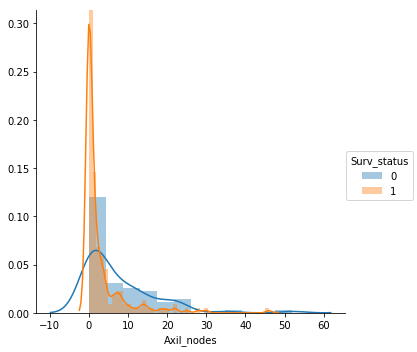

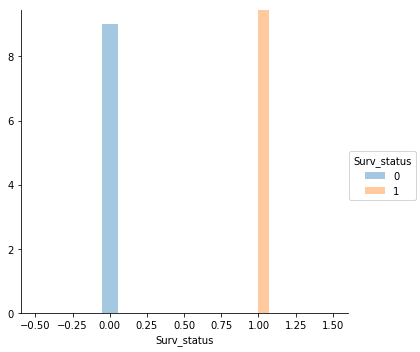

In [29]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='Surv_status', size=5)
    fg.map(sns.distplot, feature).add_legend()

Through the charts above, it turns out that more patients die between the age of 35 and 55 while others survive. Furthermore, the black year of breast cancer is 1963 as the number of deaths is extremely high. Therefore, the patients treated after 1963 have a higher chance to survive than the rest.

We can verify what the graphs showed us through the code below.

In [38]:
df.Operation_Year[df.Surv_status==0].median()

63.0

The charts gave us useful information about the relation between year of treatment, age and survival status. However, this is still insufficient since we want to know the impact of the number of positive axillary nodes detected and the patient status. To do this, we will use box plot for better visualization.

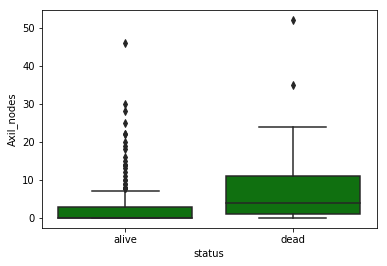

In [37]:
sns.boxplot(data=df, x='status', y='Axil_nodes', color='g')

**Observations**

1.The number of positive nodes is between 0 and 10 for most of patients.

2.Patients who have a number of nodes between 0 and 5 survive more than those who have number is higher than 5.

3.The typical number of axial nodes is 2

**Applying our model**

We will be using Gaussian Naive Bayes as our ML classifier.

Some of its advantages are:

.Very simple, easy to implement and fast.

.Needs less training data.

.Not sensitive to irrelevant features.

Luckily, our dataset includes only numerical values so pandas values function will work like a charm. We start by returning a numpy representation of our dataframe. Besides, we will extract features and labels. Our target variable is survival status and our features are the rest of columns. For the sake of simplicity, we’ll be using random forest to split our data. This will save us a lot of time.

In [52]:
#Numpy representation of our dataset
new_df = df.values
# select the first 3 columns
X = new_df[:,:3]
#select the 4th column
Y = new_df[:,3]

In [53]:
#Random forest 
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, 
test_size=0.30, random_state=10)

In [57]:
clf = GaussianNB()
clf.fit(X_train,Y_train)

In [ ]:
pred = clf.predict(X_validation)
acc = accuracy_score(Y_validation,predictions)
print acc